In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from scipy import stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [5]:
df.shape

(50, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [10]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [11]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [12]:
corrl=df.corr()
corrl

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


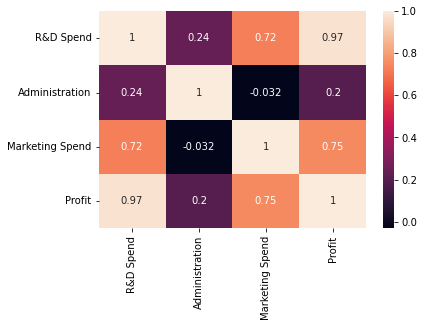

In [13]:
sns.heatmap(corrl,annot=True)
plt.show()

# Data Visualization

Text(0.5, 1.0, 'R&D Spend vs Profit')

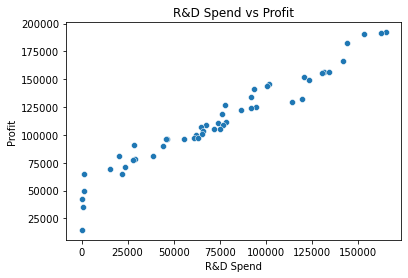

In [14]:
sns.scatterplot(x='R&D Spend',y='Profit',data=df)
plt.title('R&D Spend vs Profit')

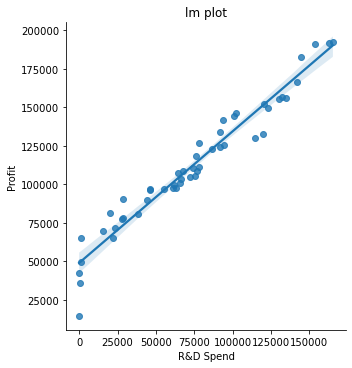

In [15]:
sns.lmplot(x='R&D Spend',y='Profit',data=df)
plt.title('lm plot')
plt.show()

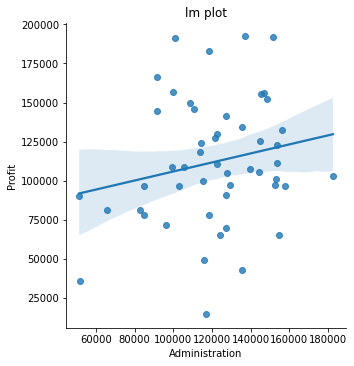

In [16]:
sns.lmplot(x='Administration',y='Profit',data=df)
plt.title('lm plot')
plt.show()

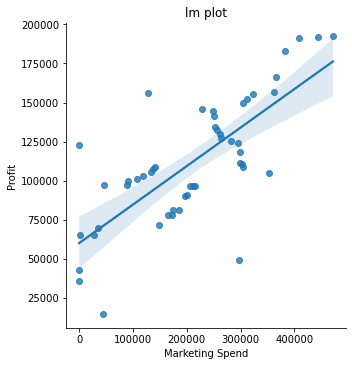

In [17]:
sns.lmplot(x='Marketing Spend',y='Profit',data=df)
plt.title('lm plot')
plt.show()

In [18]:
def plot(data,variable):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.distplot(data[variable])
    plt.grid(True)
    plt.title(variable)
    plt.subplot(1,2,2)
    stats.probplot(data[variable],dist='norm',plot=plt)
    plt.grid(True)
    plt.show()

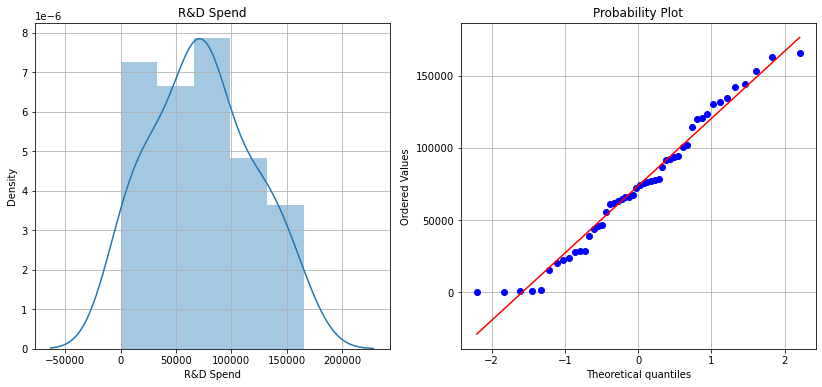

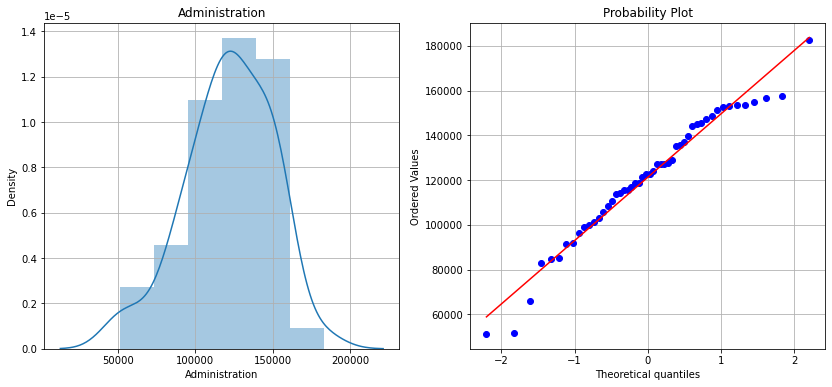

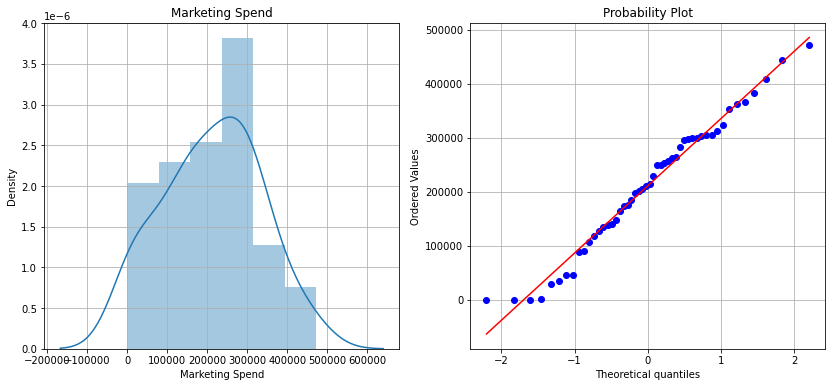

(None, None, None)

In [19]:
plot(df,'R&D Spend') , plot(df,'Administration') ,plot(df,'Marketing Spend')

In [20]:
df.skew()
#by observing the plots and skewness,we can say our data follows normal distribution.

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

In [21]:
df.kurtosis()
#by observing kurtosis we can say that our input variables maybe not contains any outliers

R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

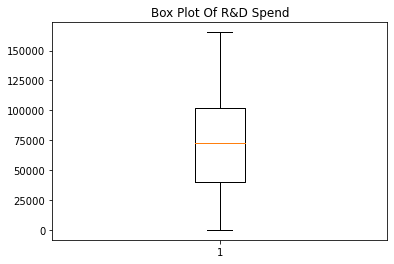

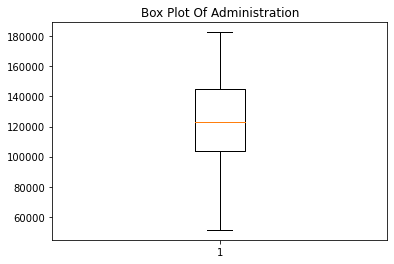

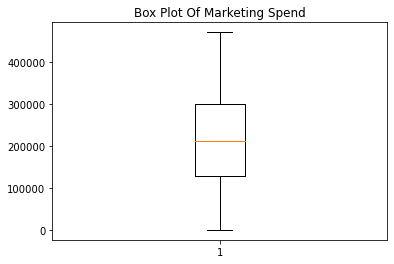

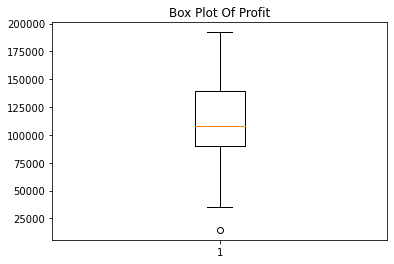

In [22]:
plt.boxplot(x='R&D Spend',data=df)
plt.title('Box Plot Of R&D Spend')
plt.show()

plt.boxplot(x='Administration',data=df)
plt.title('Box Plot Of Administration')
plt.show()

plt.boxplot(x='Marketing Spend',data=df)
plt.title('Box Plot Of Marketing Spend')
plt.show()

plt.boxplot(x='Profit',data=df)
plt.title('Box Plot Of Profit')
plt.show()

In [23]:
#from above box-plots we can say that,there are no outliers in our input variables.
#There is one outlier in our output variable.


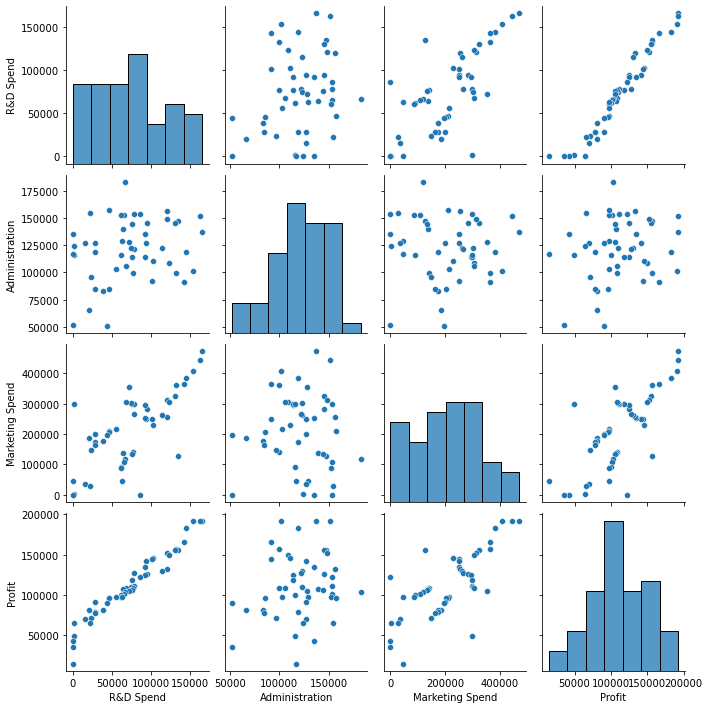

In [24]:
sns.pairplot(data=df)
plt.show()

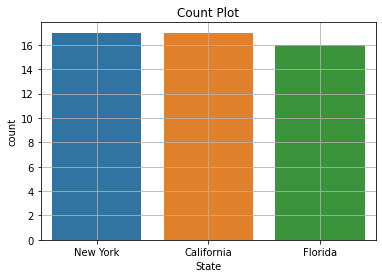

In [25]:
sns.countplot(x='State',data=df)
plt.title('Count Plot')
plt.grid(True)
plt.show()

# Data Preparation

In [26]:
del df["State"]

In [27]:
df.columns=['R_D_Spend','Administration','Marketing_Spend','Profit']

In [28]:
df.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Model Building || Model Training

In [29]:
model=smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=df).fit()

In [30]:
model.params

Intercept          50122.192990
R_D_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [31]:
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
R_D_Spend          17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
R_D_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [32]:
def model_name(model):
    print('R-square                           : ',round(model.rsquared,4))
    print('Adjusted R-square                  : ',round(model.rsquared_adj,4))
    print('Akaike information criterion (AIC) : ',round(model.aic,4))
    print('Bayesian information criterion(BIC): ',round(model.bic,4))

In [33]:
model_name(model)

R-square                           :  0.9507
Adjusted R-square                  :  0.9475
Akaike information criterion (AIC) :  1058.7715
Bayesian information criterion(BIC):  1066.4196


# Simple Linear Regression Models

In [34]:
m_RD=smf.ols('Profit~R_D_Spend',data=df).fit()
print(m_RD.tvalues, '\n', m_RD.pvalues)  

Intercept    19.320288
R_D_Spend    29.151139
dtype: float64 
 Intercept    2.782697e-24
R_D_Spend    3.500322e-32
dtype: float64


In [35]:
m_Ad=smf.ols('Profit~Administration',data=df).fit()
print(m_Ad.tvalues, '\n', m_Ad.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [36]:
m_Ma=smf.ols('Profit~Marketing_Spend',data=df).fit()
print(m_Ma.tvalues, '\n', m_Ma.pvalues) 

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [37]:
m_Ma_Ad=smf.ols('Profit~Administration+Marketing_Spend',data=df).fit()
print(m_Ma_Ad.tvalues, '\n', m_Ma_Ad.pvalues) 

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


# Calculating VIF

In [38]:
rsq_R_D_Spend=smf.ols('R_D_Spend~Administration+Marketing_Spend',data=df).fit().rsquared
vif_R_D_Spend=1/(1-rsq_R_D_Spend)

rsq_Administration=smf.ols('Administration~R_D_Spend+Marketing_Spend',data=df).fit().rsquared
vif_Administration=1/(1-rsq_Administration)

rsq_Marketing_Spend=smf.ols('Marketing_Spend~Administration+R_D_Spend',data=df).fit().rsquared
vif_Marketing_Spendg=1/(1-rsq_Marketing_Spend)

print(' vif_R_D_Spend        :',vif_R_D_Spend,'\n','vif_Administration   :',vif_Administration , '\n' ,'vif_Marketing_Spendg :',vif_Marketing_Spendg)

 vif_R_D_Spend        : 2.4689030699947017 
 vif_Administration   : 1.1750910070550458 
 vif_Marketing_Spendg : 2.3267732905308773


In [39]:
#By observing VIF of each input variable,the values are less that 5,hence we can say that there is no Multicollinearity.

### Test for normality of residuals

In [40]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

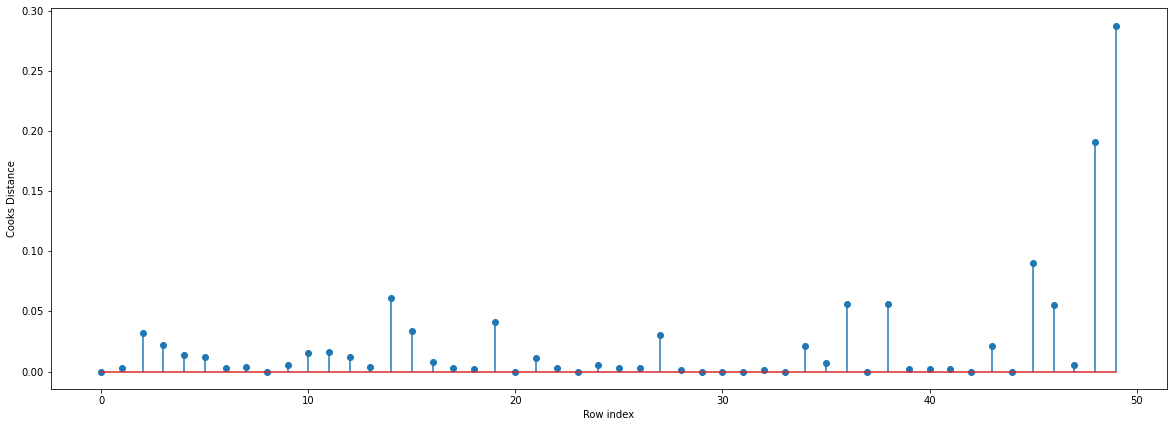

In [41]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index and value of influencer where c is more.
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [43]:
#Since the value is <1 ,we can say that there are no any outliers .

# check high Influence points by influence plot

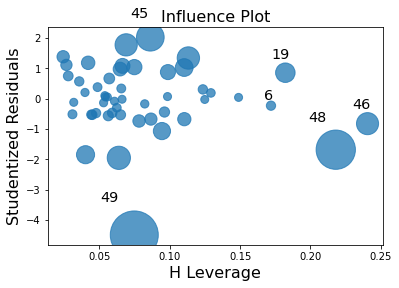

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [45]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

#### by observing above influence plot and steam plot,we can say that there is no any value which cross the leverage_cutoff, hence we can say that there are no influencers/outliers.


# Model Selection

In [46]:
actual = df["Profit"]

In [47]:
df.drop('Profit',axis=1,inplace=True)

In [48]:
pred_y = model.predict(df)

In [49]:
pred_y.head(10)

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
5    163580.780571
6    158114.096669
7    160021.363048
8    151741.699699
9    154884.684110
dtype: float64

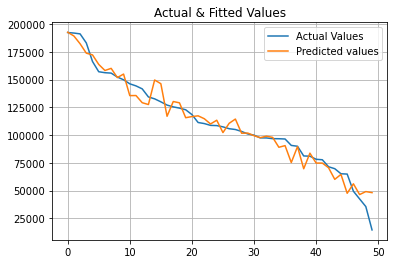

In [50]:
plt.plot(actual,label='Actual Values')
plt.plot(pred_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()